# Knewton Machine Learning Challenge

In [52]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://assets.wired.com/photos/w_1390,h_782/wp-content/uploads/2017/01/Mars_Op-Ed_200144771-001-600x338-e1485388333690.jpg")

## Exploratory Data Analysis

To get situated, some basic information is gleaned from the data.

Table of contents:
0. [Shape of data](#ds)
1. [EDA on Questions](#eda_questions)
2. [EDA on Students](#eda_students)

In [34]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline  

In [35]:
# set seed
np.random.seed(1234)

### 1. Shape of data<a id='ds'></a>

In [36]:
# read data
df = pd.read_csv('astudentData.csv')

In [37]:
df.head(3)

,question_id,user_id,correct
0,13,63994,0
1,13,7633,0
2,13,33056,0


In [38]:
# Familiarize ourselves with size of df
num_qs = df.groupby('question_id').count().shape[0]
print('There are {0} unique questions.'.format(num_qs))

num_takers = df.groupby('user_id').count().shape[0]
print('There are {0} unique test takers.'.format(num_takers))

There are 391 unique questions.
There are 12839 unique test takers.


<a id='eda_questions'></a>
### 2. EDA on questions from last year's test.

In [39]:
# Find % correct for each question
scores = df.groupby('question_id')['correct'].mean() 

In [40]:
mean_score = scores.mean()
median_score = scores.median()
print("The mean score is %.2f"  % mean_score)
print("The median score is %.2f"  % median_score)

The mean score is 0.64
The median score is 0.67


To interpret the above: the median question had 2/3 of the respondents answer it correctly.

In [41]:
questions_taken = df.groupby(['user_id'])['question_id'].count() 

Students last year took tests of varying lengths. The average test length was  {{print("%.2f" % questions_taken.mean())}} questions long. This differs from this year, when all of my students will only take 5 questions each.

<a id='eda_students'></a>
### 3. EDA on students from last year's test.

In [42]:
# How did you students do?
student_scores = df.groupby('user_id')['correct'].mean() 

/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


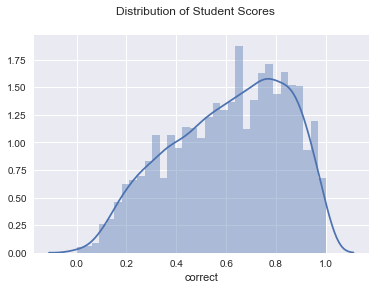

In [43]:
sns.distplot(student_scores)
sns.plt.suptitle('Distribution of Student Scores')
plt.show()

In [44]:
scores.sort_values()[1:5]

question_id
15412    0.132931
12755    0.137405
12717    0.214286
5566     0.218750
Name: correct, dtype: float64

Above, we can see that there is a reasonable spread amongst the students, with a slight skew left.